In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import results
import treecorr

/u/ki/mbaumer/anaconda/lib/python2.7/site-packages/matplotlib/__init__.py:1318: UserWarning:  This call to matplotlib.use() has no effect
because the backend has already been chosen;
matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

  warnings.warn(_use_error_msg)


In [20]:
gal_res = results.Results('ZSPEC0.45_0.6nside1024nJack30','test4',30)
gal_res.load_all_data()
dm_res = results.Results('DISTANCE0.45_0.6nside1024nJack30','test4',30)
dm_res.load_all_data()

In [21]:
dummy2pt = treecorr.KKCorrelation(config=gal_res.configdict['2PCF'])
bins = np.exp(dummy2pt.logr)
gal_xis = np.array(gal_res.xis).T
dm_xis = np.array(dm_res.xis).T

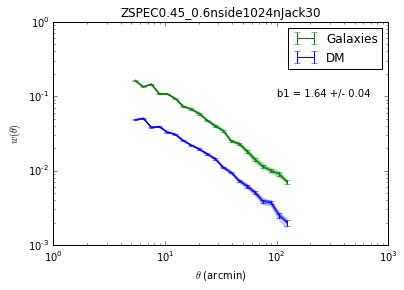

In [28]:
plt.loglog(bins,gal_xis,color='g',alpha=.1);
plt.loglog(bins,dm_xis,color='b',alpha=.1);
plt.errorbar(bins,np.mean(gal_xis,axis=1),yerr=np.sqrt((gal_xis.shape[1]-1.0)/gal_xis.shape[1]*np.var(gal_xis,axis=1)),color='g',label='Galaxies')
plt.errorbar(bins,np.mean(dm_xis,axis=1),yerr=np.sqrt((dm_xis.shape[1]-1.0)/dm_xis.shape[1]*np.var(dm_xis,axis=1)),color='b',label='DM')
plt.xlabel(r'$\theta$ (arcmin)')
plt.ylabel(r'$w(\theta)$')
#b1 = np.round(np.mean(sampler.flatchain),2)
#b1_err = np.round(np.std(sampler.flatchain),2)
bias_text = 'b1 = {} +/- {}'.format(b1,b1_err)
plt.text(100,.1,bias_text)
plt.legend()
plt.title(gal_res.dataname)

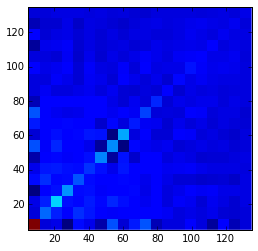

In [22]:
covmat = np.cov(gal_xis)
plt.imshow(covmat,extent=[5,135,5,135],origin='lower',interpolation='None')

In [7]:
import emcee

In [23]:
def lnprob(x):
    return -0.5 * np.dot(np.dot(np.mean(gal_xis-x**2*dm_xis,axis=1).T,np.linalg.inv(covmat)),np.mean(gal_xis-x**2*dm_xis,axis=1))

ndim, nwalkers = 1, 10
p0 = [2*np.random.rand(ndim)+0.5 for i in range(nwalkers)]

sampler = emcee.EnsembleSampler(nwalkers, ndim, lnprob)
samples = sampler.run_mcmc(p0, 1000)

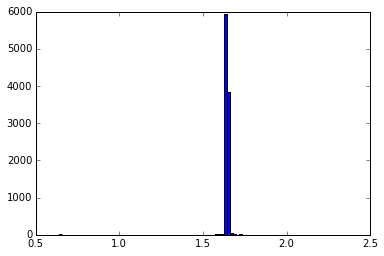

In [25]:
plt.hist(sampler.flatchain[sampler.flatchain > 0],bins=100);

In [26]:
b1_err = np.round(np.std(sampler.flatchain[sampler.flatchain > 0]),2)

In [27]:
b1 = np.round(np.mean(sampler.flatchain[sampler.flatchain > 0]),2)